---
title: "Airbnb Exploratory Data Analysis"
author: "Santhosh Kumar"
date: June 22, 2024
toc: true
number-sections: true
highlight-style: pygments
format:
  html:
    viewport: true
    theme: cosmo
    code-fold: true
    html-math-method: mathjax
    section-divs: true
document-css: false
jupyter: python3
---

## Room Type and countries

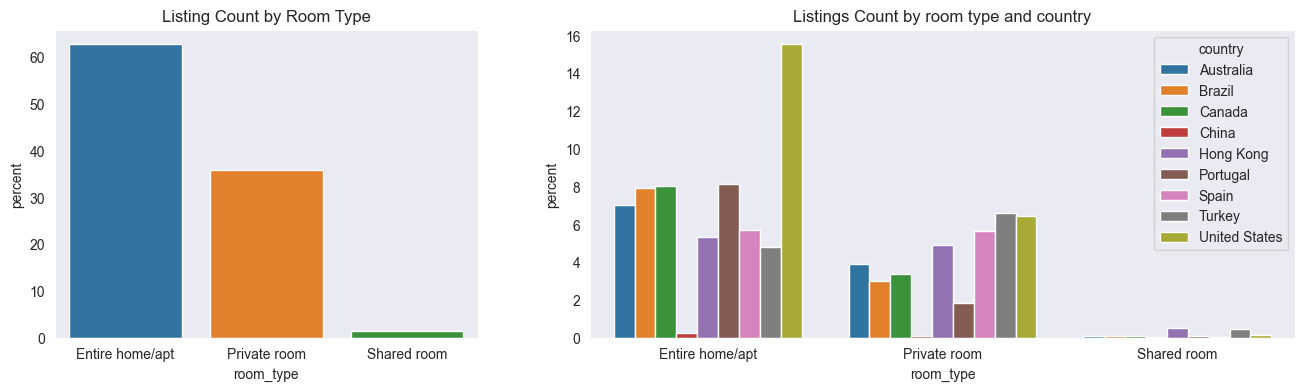

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [6, 10]})
axs[0].set_title('Listing Count by Room Type')
sns.countplot(x=df1['room_type'],hue=df1.room_type,stat="percent", ax=axs[0])
sns.countplot(x=df1['room_type'],hue=df1.country,stat="percent", ax=axs[1])
axs[1].set_title('Listings Count by room type and country')
plt.show()

1. Most of listings are Entire Home/Apartment follwed by Provate Room and Shared Room
2. United States holds 50% higher listings in Entire Home/Apartment Room Type comparing other countries
3. All countries listings are more or less equal in Private Room
4. China is less contributor when comparing all countries

## Listing price in terms cancellation policy, accomadates with Room Type

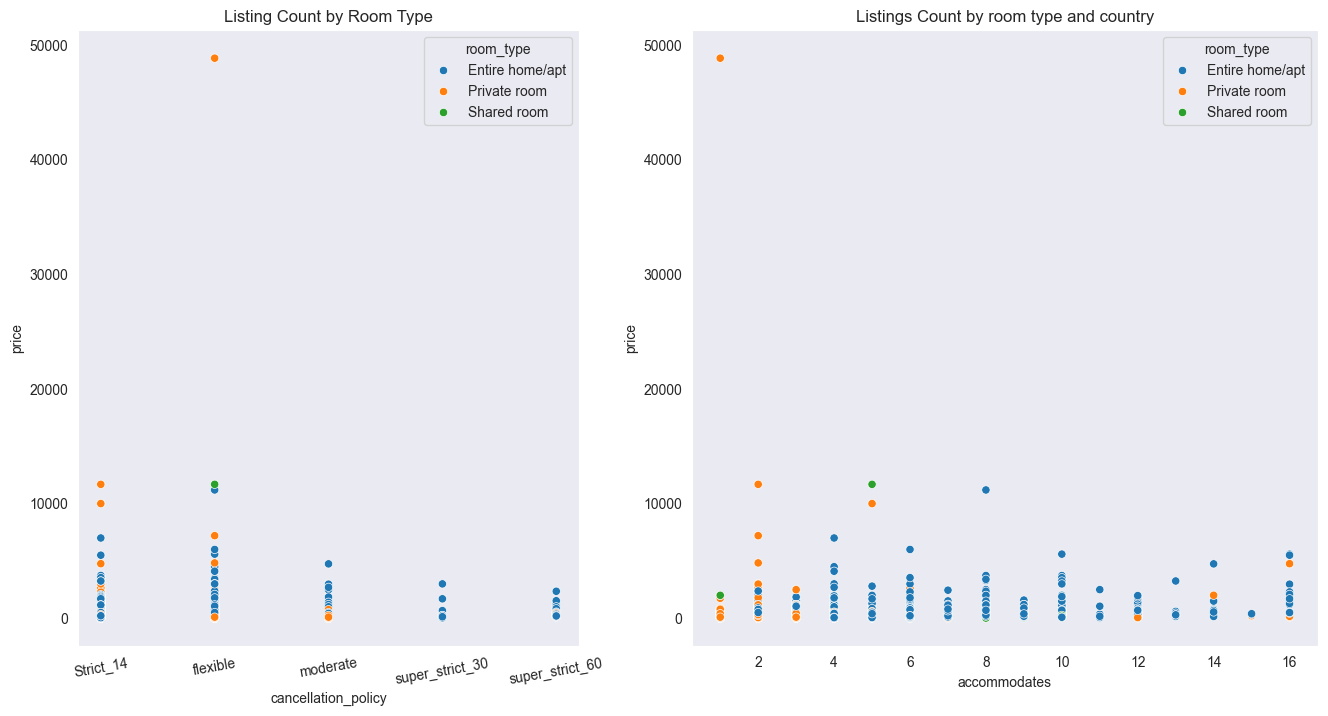

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,8), gridspec_kw={'width_ratios': [8, 10]})
axs[0].set_title('Listing Count by Room Type')
sns.scatterplot(data=df1,x='cancellation_policy',y='price',hue='room_type',ax=axs[0])

axs[0].tick_params(axis='x', rotation=10)
sns.scatterplot(data=df1, x="accommodates", y="price", hue="room_type", ax=axs[1])
axs[1].set_title('Listings Count by room type and country')
plt.show()


1. From the left plot, we can see that the most of the listings are booked under Strict 14 cancellation policy type
2. From th right side plot, we can see that one accomadate listings are mostly Private rooms
3. From th right side plot, we can see that the most of the listings are booked with 2 accomadates.  

## Top 10 Hosts and Super Host interms of listing count

C:\Users\sansu\AppData\Local\Temp\ipykernel_17204\575269493.py:9: UserWarning: The palette list has more values (74) than needed (10), which may not be intended.
  sns.barplot(x=top_host.values, y=top_host.index, orient='h',hue=top_host.index,palette=colors,ax=axs[1])


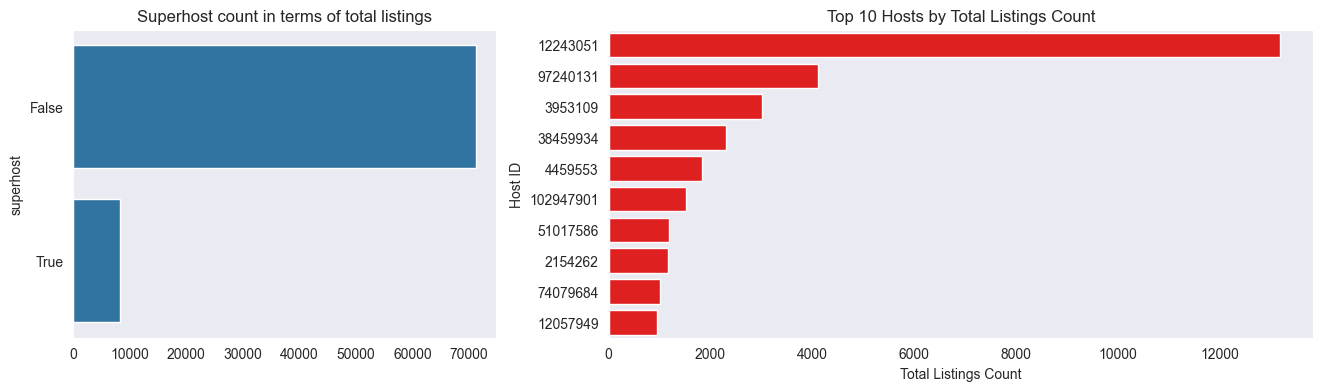

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [6, 10]})
axs[0].set_title('Superhost count in terms of total listings')
top_superhost = df1.groupby('superhost')['host_total_listings_count'].sum()
sns.barplot(x=top_superhost.values, y=top_superhost.index, orient='h',ax=axs[0]) 

top_host = df1.groupby('host_id')['host_total_listings_count'].sum().nlargest(10)
top_host_superhost = df1[df1['host_id'].isin(top_host.index)]['superhost']
colors = ['green' if sh else 'red' for sh in top_host_superhost]
sns.barplot(x=top_host.values, y=top_host.index, orient='h',hue=top_host.index,palette=colors,ax=axs[1]) 
plt.xlabel('Total Listings Count')
plt.ylabel('Host ID')
axs[1].set_title('Top 10 Hosts by Total Listings Count')
plt.show()

1. 80% of listings done by normal host
2. Top hosts in terms of total listing is also normal hosts

## Cancellation Policy and Listings

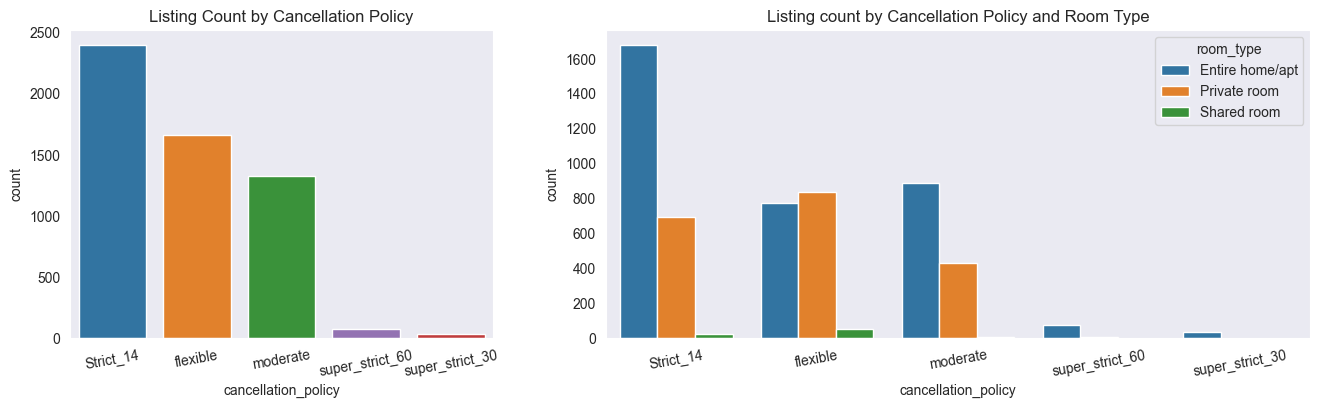

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cancellation_order = df1['cancellation_policy'].value_counts().index

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [6, 10]})

# First subplot
axs[0].set_title('Listing Count by Cancellation Policy')
sns.countplot(x=df1['cancellation_policy'], hue=df1.cancellation_policy, order=cancellation_order, ax=axs[0])
axs[0].tick_params(axis='x', rotation=10)  # Rotate x-axis labels

# Second subplot
axs[1].set_title('Listing count by Cancellation Policy and Room Type')
sns.countplot(x=df1['cancellation_policy'], hue=df1.room_type, order=cancellation_order, ax=axs[1])
axs[1].tick_params(axis='x', rotation=10)  # Rotate x-axis labels

plt.show()


1. Most listings are from strict 14 cancellation policy
2. Most of the Private rooms are booked under flexible cancellation policy
3. 30 days cancellation is lesser than comparing all.

## Top listings in terms of country


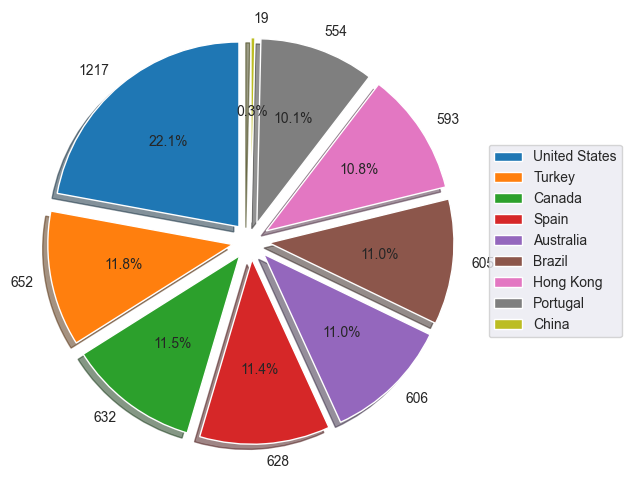

In [ ]:
plt.figure(figsize=(15,6))
shape = df1.country.value_counts().values
labels = df1.country.value_counts().index
plt.pie(x=shape,labels=shape,explode=[.1] * len(shape),shadow=True, autopct = '%1.1f%%', startangle=90)
plt.legend(labels,loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

1. US is listed 21% of properties and holds predominant place when compare to other countries.
2. Followed by US, all other countries listed almost equally except China as it holds 0.3%.

## Average price, Security Deposit, Cleasing Fee for each room type


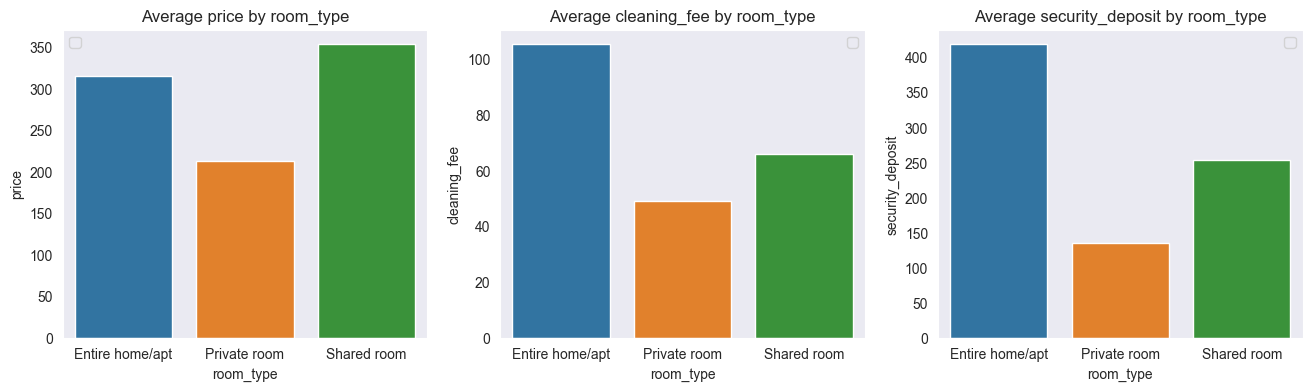

In [ ]:
df_price_room_type = pd.DataFrame(df1.groupby(['room_type'],observed=False).agg({'price': 'mean', 'cleaning_fee': 'mean','security_deposit':'mean'}).sort_values(by='price'))
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.title('Average price by room_type')
sns.barplot(data=df_price_room_type,x='room_type',y='price',hue='room_type')
plt.legend('')
plt.subplot(132)
plt.title('Average cleaning_fee by room_type')
sns.barplot(data=df_price_room_type,x='room_type',y='cleaning_fee',hue='room_type')
plt.legend('')
plt.subplot(133)
plt.title('Average security_deposit by room_type')
sns.barplot(data=df_price_room_type,x='room_type',y='security_deposit',hue='room_type')
plt.legend('')
plt.show()

1. Eventhough shared room has less numbers when compared to others it's average price, cleaning fee are  high but security deposit is less.
2. Average Security Deposit it almost equal to Average price. We may also consider that not all the properties requesting Security Deposit. The average is derrived from the listings that are requested Security Deposit.
3. Entire home/apt holds predominant place which seems obvious. It is higher count.

## Comparison of Price Distributions and Density of Price Ranges for Each Room Type

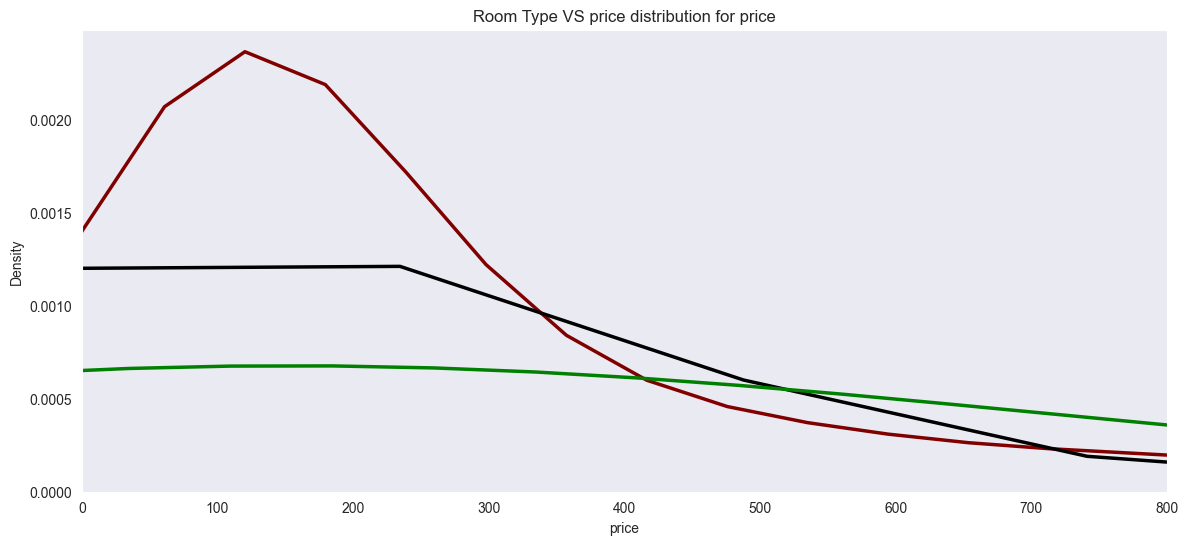

In [ ]:
plt.figure(figsize=(14,6))
sns.kdeplot(df1[df1.room_type=='Entire home/apt'].price,color='maroon',label='Entire home/apt',linewidth=2.5)
sns.kdeplot(df1[df1.room_type=='Private room'].price,color='black',label='Private room',linewidth=2.5)
sns.kdeplot(df1[df1.room_type=='Shared room'].price,color='green',label='Shared room',linewidth=2.5)
plt.title('Room Type VS price distribution for price')
plt.xlim(0,800)
plt.show()

## Comparison of Price Distributions and Density of Price Ranges for Each top 5 region

## Price distribution in terms of room type and Cancellation poli

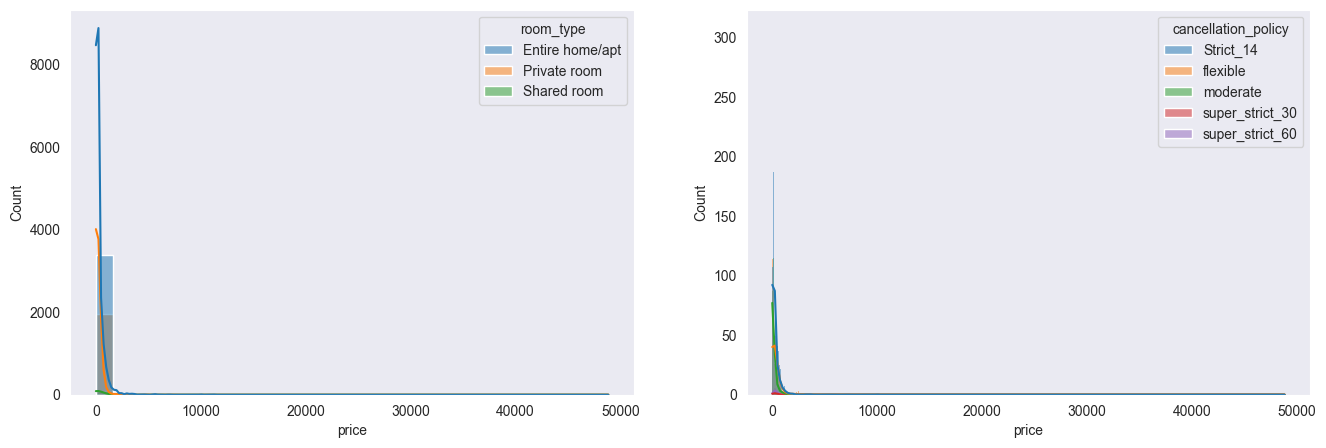

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
plt.subplot(121)
sns.histplot(data=df1,x='price',bins=30,kde=True,hue='room_type')
plt.subplot(122)
sns.histplot(data=df1,x='price',kde=True,hue='cancellation_policy')
plt.show()




1. Entire home/apt tend to high proce followed by Private Room. Shared room very less comparitively Entire home and Private room.
2. Strict 14 and Flexible cancellation type properties are listed most frequestly.    


## Minimum & maximun Nights by room type

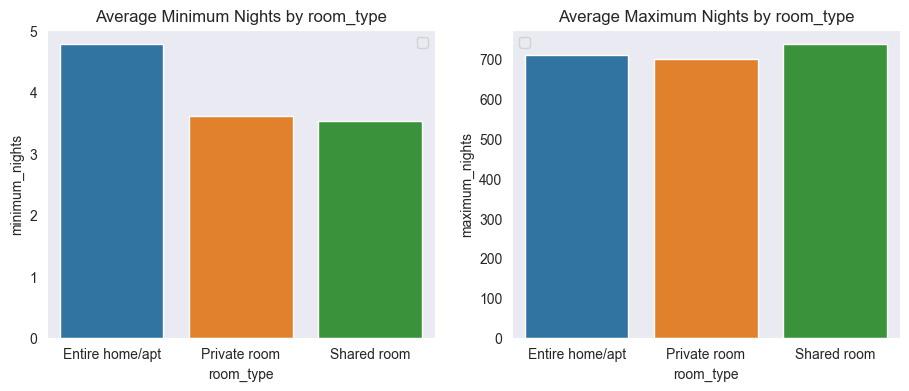

In [ ]:
min_max_ni8 = pd.DataFrame(df1.groupby(['room_type'],observed=False).agg({'minimum_nights': 'mean','maximum_nights':'mean'}))
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Average Minimum Nights by room_type')
sns.barplot(data=min_max_ni8,x='room_type',y='minimum_nights',hue='room_type')
plt.legend('')
plt.subplot(122)
plt.title('Average Maximum Nights by room_type')
sns.barplot(data=min_max_ni8,x='room_type',y='maximum_nights',hue='room_type')
plt.legend('')
plt.show()

1. Average Minumum Night for Entire home/apt is aroun 5 days and Maximun night is around 700 days
2. Rememeber, as we discussed about these variables in Outlier Treatment, the minimum and Maximum stays may vary depends on several criteria and property type.

## Reviews count interms of Cancellation policy and Room type

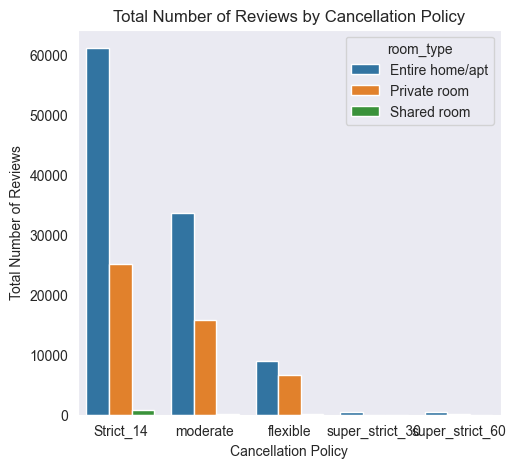

In [ ]:
min_max_ni8 = pd.DataFrame(df1.groupby(['cancellation_policy','room_type'], observed=False)['number_of_reviews'].sum()).reset_index()
min_max_ni8 = min_max_ni8.sort_values(by='number_of_reviews', ascending=False)

plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.barplot(data=min_max_ni8, x='cancellation_policy', y='number_of_reviews', order=min_max_ni8['cancellation_policy'],hue='room_type')
plt.title('Total Number of Reviews by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Total Number of Reviews')
plt.show()


1. Strict 14 holds predominant number of reviews
2. Entire home/apt has more number of reviews in all aspects

## Reviews count interms of Country and Room type

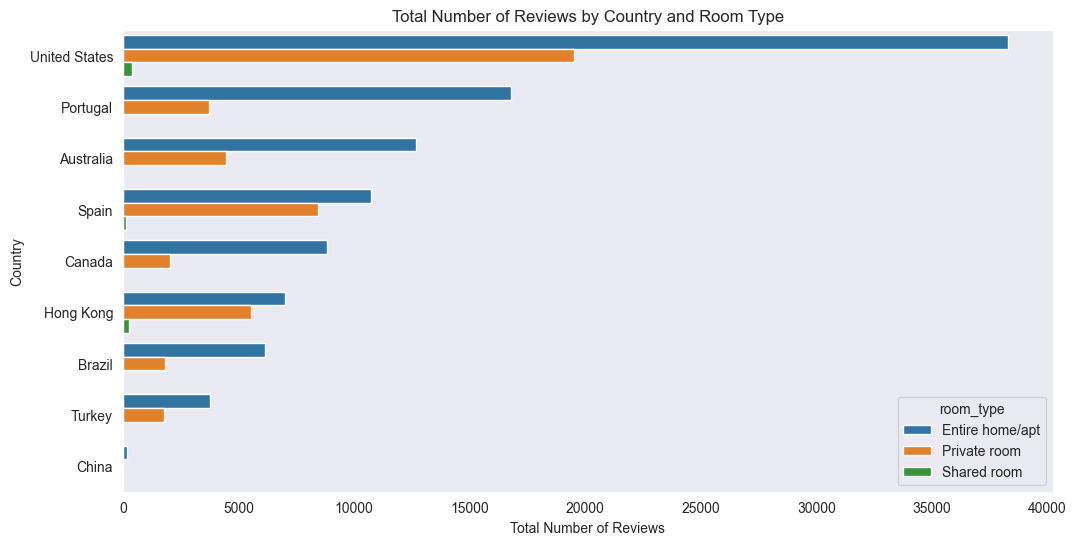

In [ ]:
Region = pd.DataFrame(df1.groupby(['country','room_type'], observed=False)['number_of_reviews'].sum()).reset_index()
Region = Region.sort_values(by='number_of_reviews', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(data=Region, y='country', x='number_of_reviews', order=Region['country'], orient='h',hue='room_type')
plt.title('Total Number of Reviews by Country and Room Type')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Country')
plt.show()


1. US holds predominant number of reviews
2. Entire home/apt has more number of reviews in all aspects

## Spatial Distribution of Listings in terms of top 10 Regions

In [ ]:
import folium


top_map = df1.groupby('region', observed=False).agg({'latitude': 'first', 'longitude': 'first', 'price': 'sum'}).reset_index()
top_5_map=top_map.sort_values(by='price')

maps = []
# Iterate through each region
for index, row in top_5_map.iterrows():
    region_listings = df1[df1['region'] == row['region']]
    maps.append(row['region'])
    # Create a map centered around the mean latitude and longitude of the region
    m = folium.Map(location=[row['latitude'], row['longitude']], zoom_start=9)

        
    # Filter the DataFrame to get listings in the current region
    
    
    # Add scatter markers for each listing in the region
    for _, listing in region_listings.iterrows():
        
        folium.Marker(location=[listing['latitude'], listing['longitude']],popup=row['region']).add_to(m)
    
    # Add the map to the list of maps
    maps.append(m)

# Display all the maps in the list
for m in maps:
    display(m)


'Sydney'

'Jordan'

'Aveiro District'

'Guangdong Province'

'Grande Porto'

'New Territories'

'Catalonia'

'Quebec'

'New York'

'New South Wales'

'Hawaii'

'Hong Kong Island'

'Hong Kong'

'Istanbul'

'Rio De Janeiro'

From above plot i could see that the 99% listings are nearby Beach, Lake, and River.

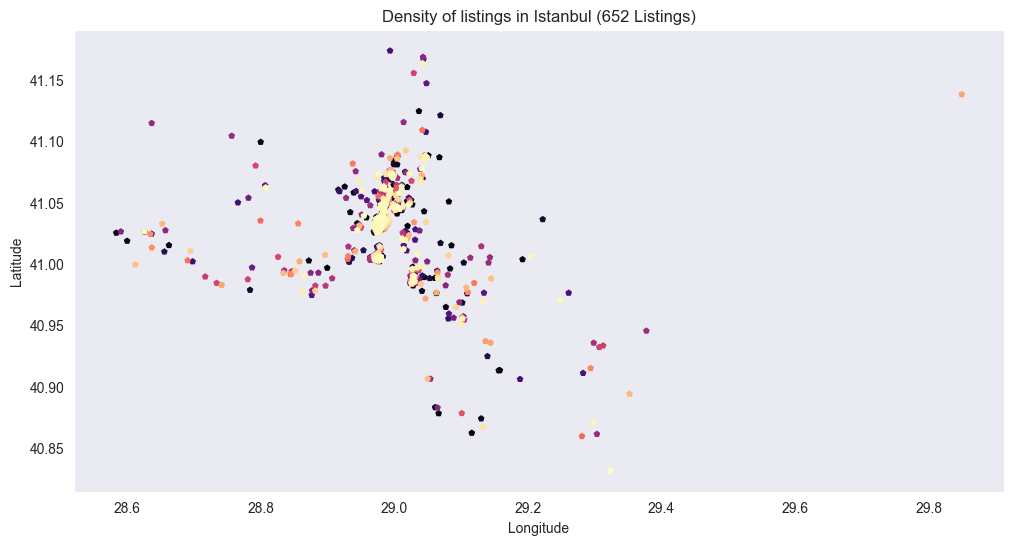

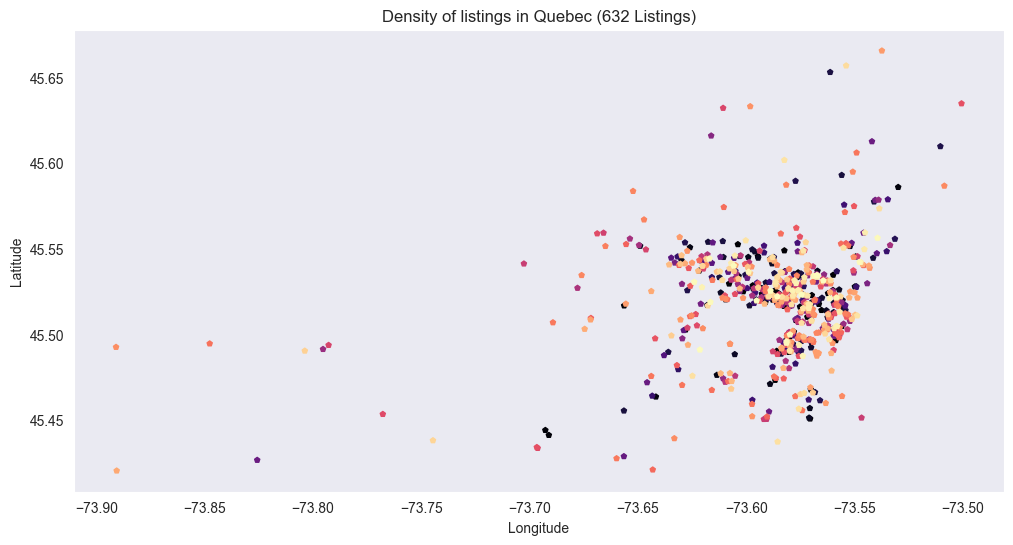

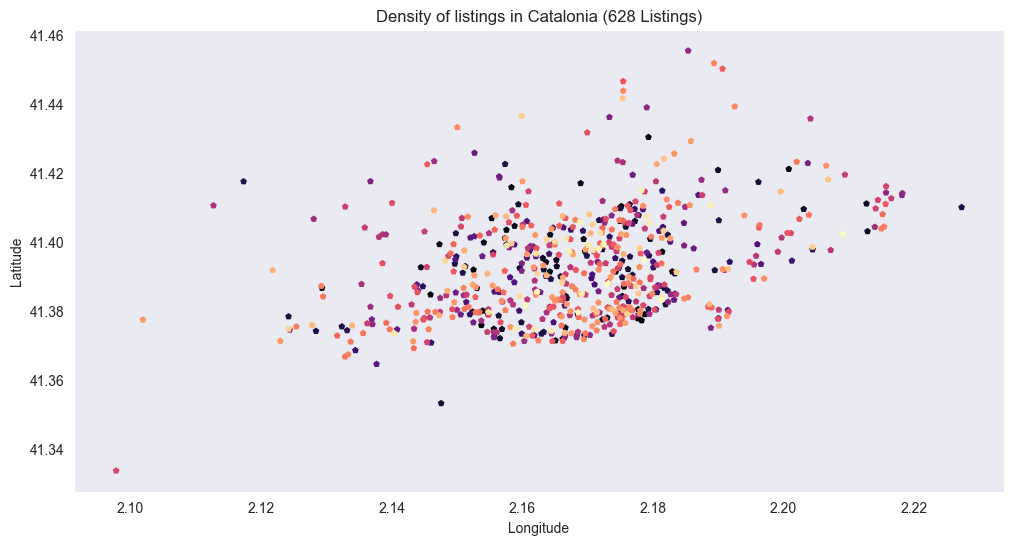

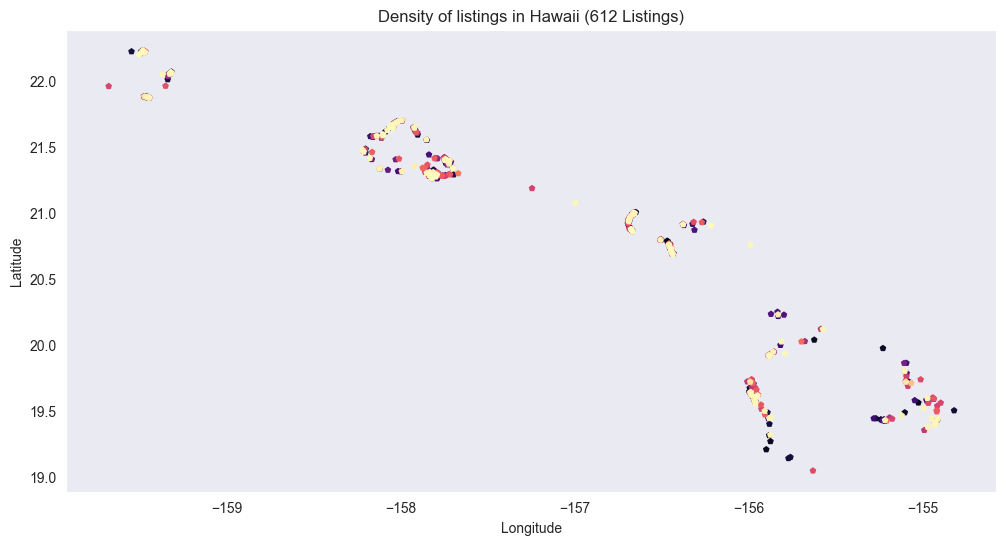

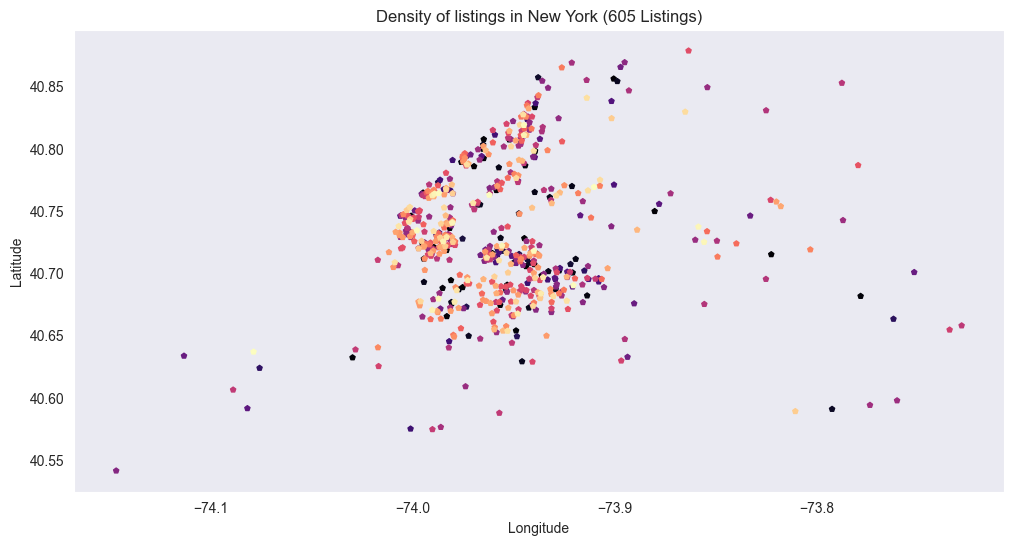

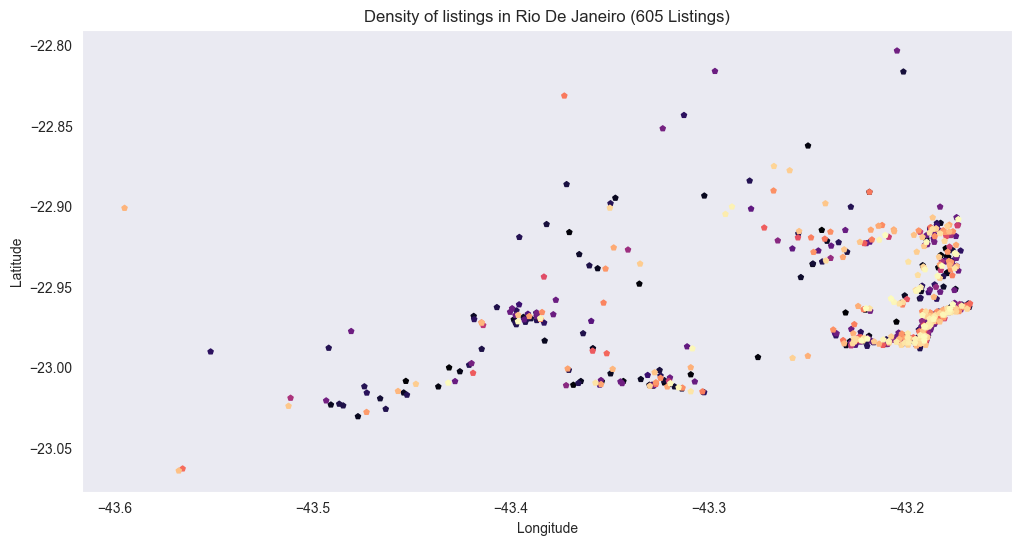

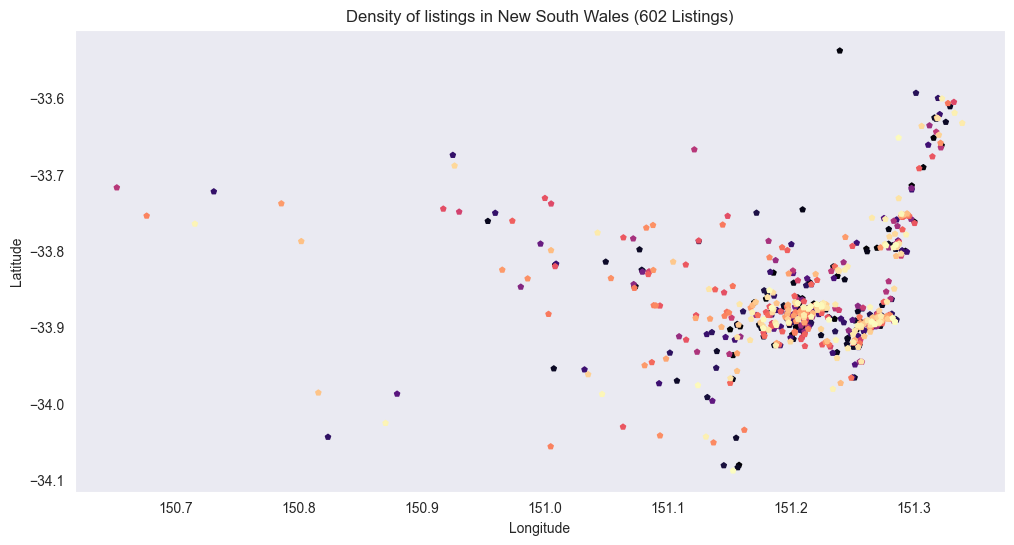

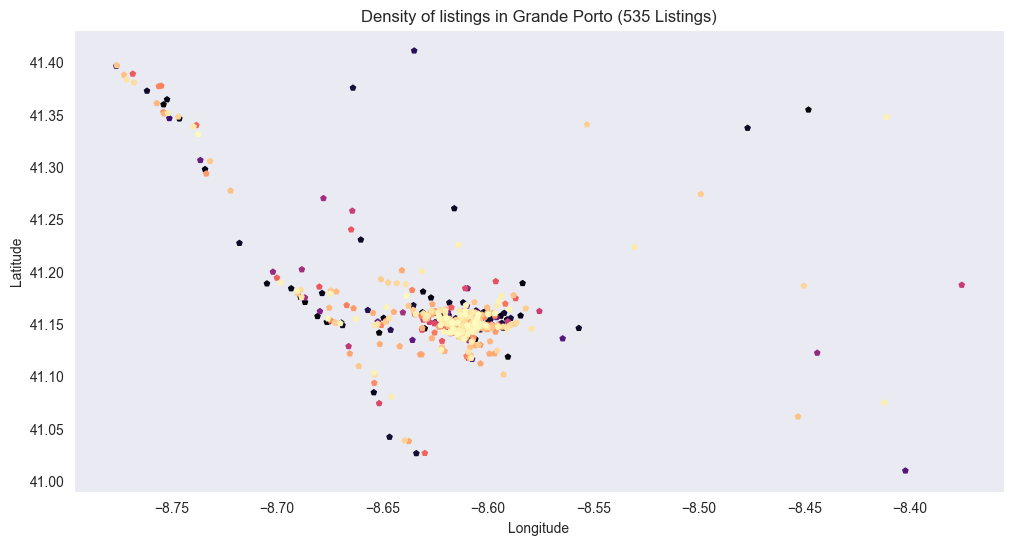

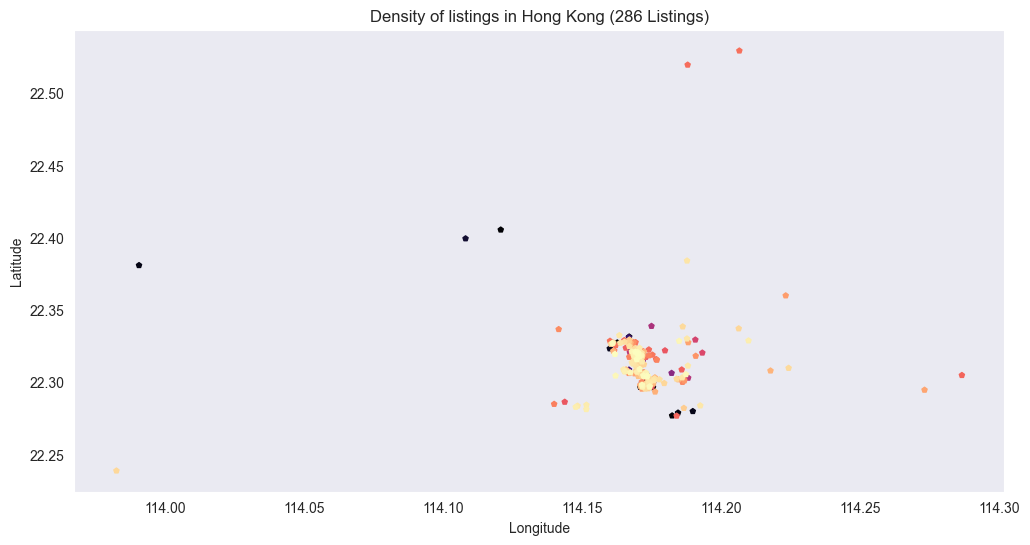

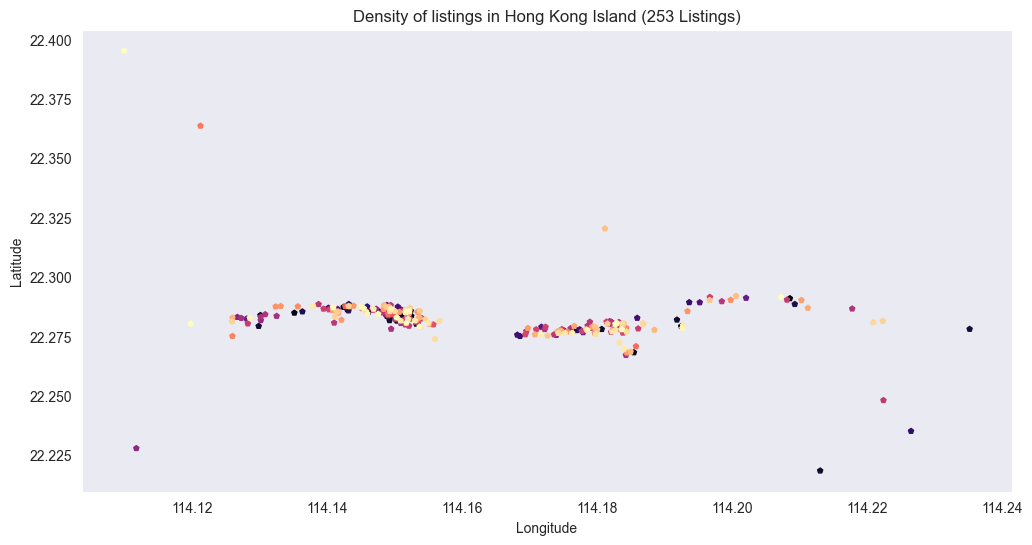

In [ ]:
df_top_region = df1.groupby('region',observed=False).size().reset_index(name='size')
df_top_region=df_top_region.sort_values(by='size',ascending=False).nlargest(10,'size')

for index, row in df_top_region.iterrows():
    region = row['region']
    dff = df1[df1['region'] == region]  # Filter DataFrame for the current region
    lat = dff['latitude'] 
    lon = dff['longitude']
    
    xy = np.vstack([lat, lon])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    z = z[idx]
    
    plt.figure(figsize=(12, 6))
    plt.scatter(lon, lat, c=z, s=15,cmap='magma',marker="p")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Density of listings in {region} ({row.values[1]} Listings)")
    print()
    plt.show()